In [1]:
from poisson_solver import*
import matplotlib.pyplot as plt

Libraries fetched!...


Problem

$$
\nabla^2 u = f \quad (x,y)\in [0,1]\times[0,1]\\
u(0,y) = q_1 \quad 0 \leq y\leq 1\\
u(1, y) = q_2 \quad 0\leq y\leq 1\\
\partial_x u(x,0) + \partial_y u(x,0) = q_3 \quad 0\leq x \leq 1\\
\partial_y u(x,1) + \partial_y u(x,1)= q_4 \quad 0\leq x \leq 1
$$

$$
f = -2\sin(x)\sin(y)\\
q_1 = q_2= \sin(x)\sin(y)\\
q3 = q_4 = \cos(x)\sin(y) + \sin(x)\cos(y)
$$

In [2]:
mesh = fd.UnitSquareMesh(10, 10)

In [9]:
model = PoissonSolver(mesh, P = 1)

PoissonSolver initialized!


In [10]:
true_sol = fd.Function(model.V)
true_sol.interpolate(fd.sin(model.x)*fd.sin(model.y))

model.impose_true_sol(true_sol)

In [11]:
bc1 = fd.Function(model.V)
bc1.interpolate(fd.sin(model.x)*fd.sin(model.y))

for i in range(1,3):
    model.impose_DBC(bc1, bc_idx = i)


In [15]:
bc3 = fd.Function(model.V)
bc3.interpolate(fd.cos(model.x)*fd.sin(model.y) + fd.sin(model.x)*fd.cos(model.y))

model.impose_NBC(bc3, bc_idx = 3)

bc4 = fd.Function(model.V)
bc4.interpolate(fd.cos(model.x)*fd.sin(model.y) + fd.sin(model.x)*fd.cos(model.y))

model.impose_NBC(bc4, bc_idx = 4)



In [16]:
model.solve()

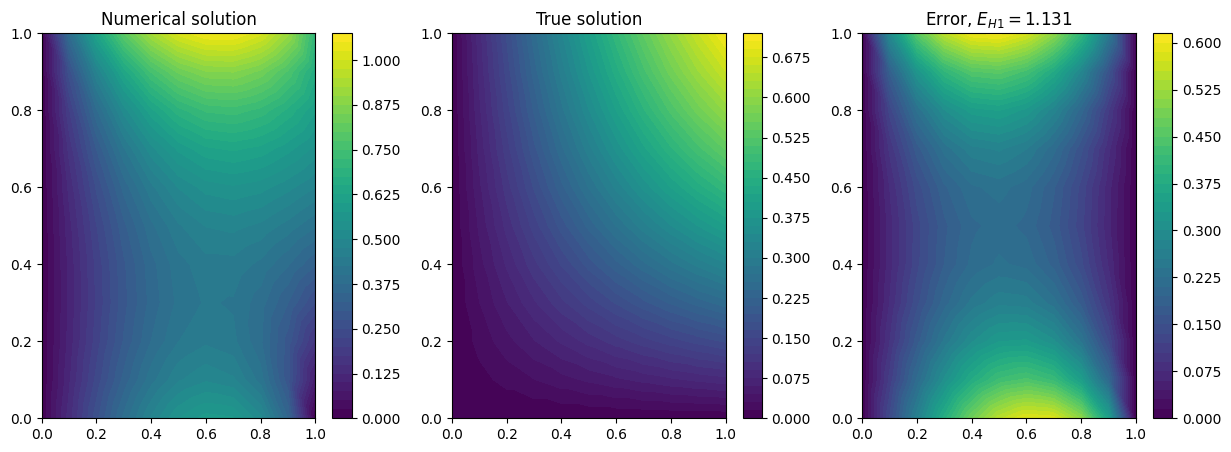

In [17]:
model.plot_results()